In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


In [3]:
from sklearn import datasets
# Load dataset
cancer = datasets.load_breast_cancer()


In [10]:
# Exploring the dataset structure
print(cancer.DESCR)

# Convert to DataFrame for ease of manipulation
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target




.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [12]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

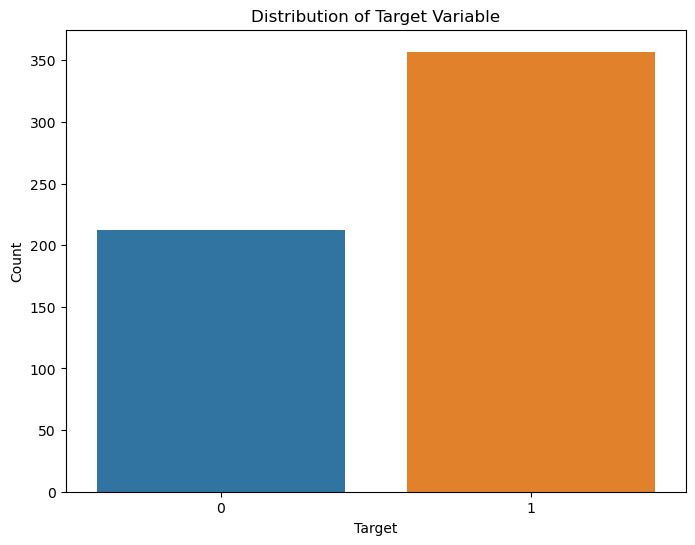

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


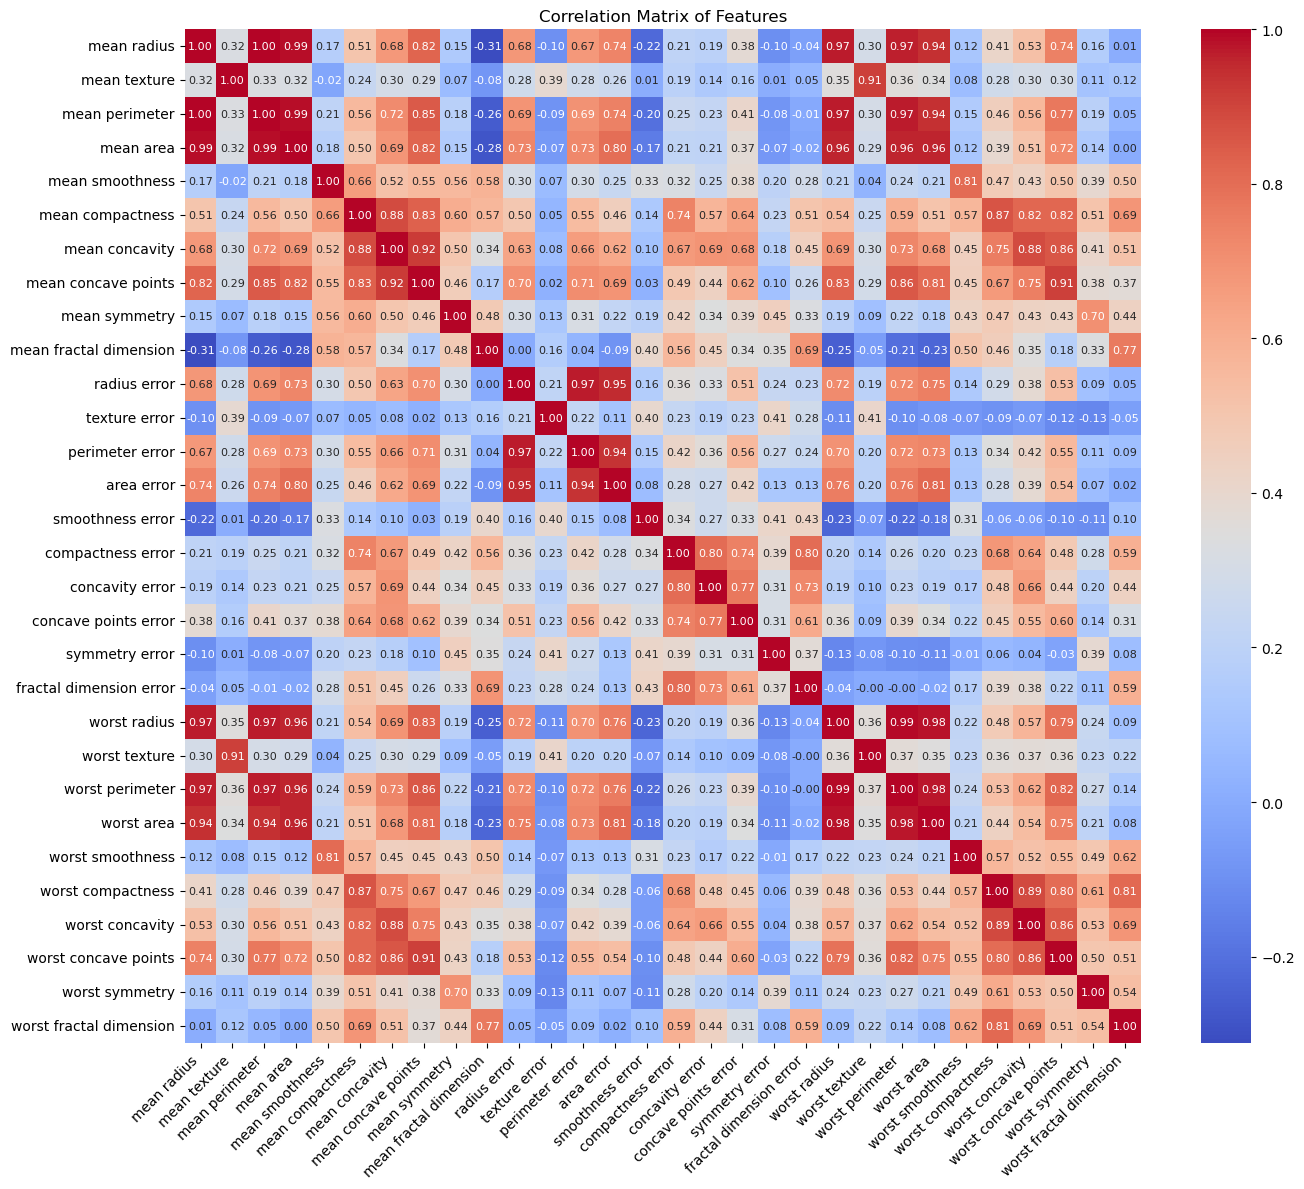

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing the features
corr = X.corr()

# Plotting the heatmap with adjustments for a clearer view
plt.figure(figsize=(14, 12))  # Increased figure size
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})  # Reduced annotation font size
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.title("Correlation Matrix of Features")
plt.tight_layout()  # Adjust layout to fit the figure size and prevent clipping of tick labels
plt.show()



In [47]:
# 'X' is the DataFrame containing the features
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_reduced = X.drop(to_drop, axis=1)



In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


       mean texture  mean smoothness  mean compactness  mean concavity  \
count    569.000000       569.000000        569.000000      569.000000   
mean      19.289649         0.096360          0.104341        0.088799   
std        4.301036         0.014064          0.052813        0.079720   
min        9.710000         0.052630          0.019380        0.000000   
25%       16.170000         0.086370          0.064920        0.029560   
50%       18.840000         0.095870          0.092630        0.061540   
75%       21.800000         0.105300          0.130400        0.130700   
max       39.280000         0.163400          0.345400        0.426800   

       mean concave points  mean symmetry  mean fractal dimension  \
count           569.000000     569.000000              569.000000   
mean              0.048919       0.181162                0.062798   
std               0.038803       0.027414                0.007060   
min               0.000000       0.106000                

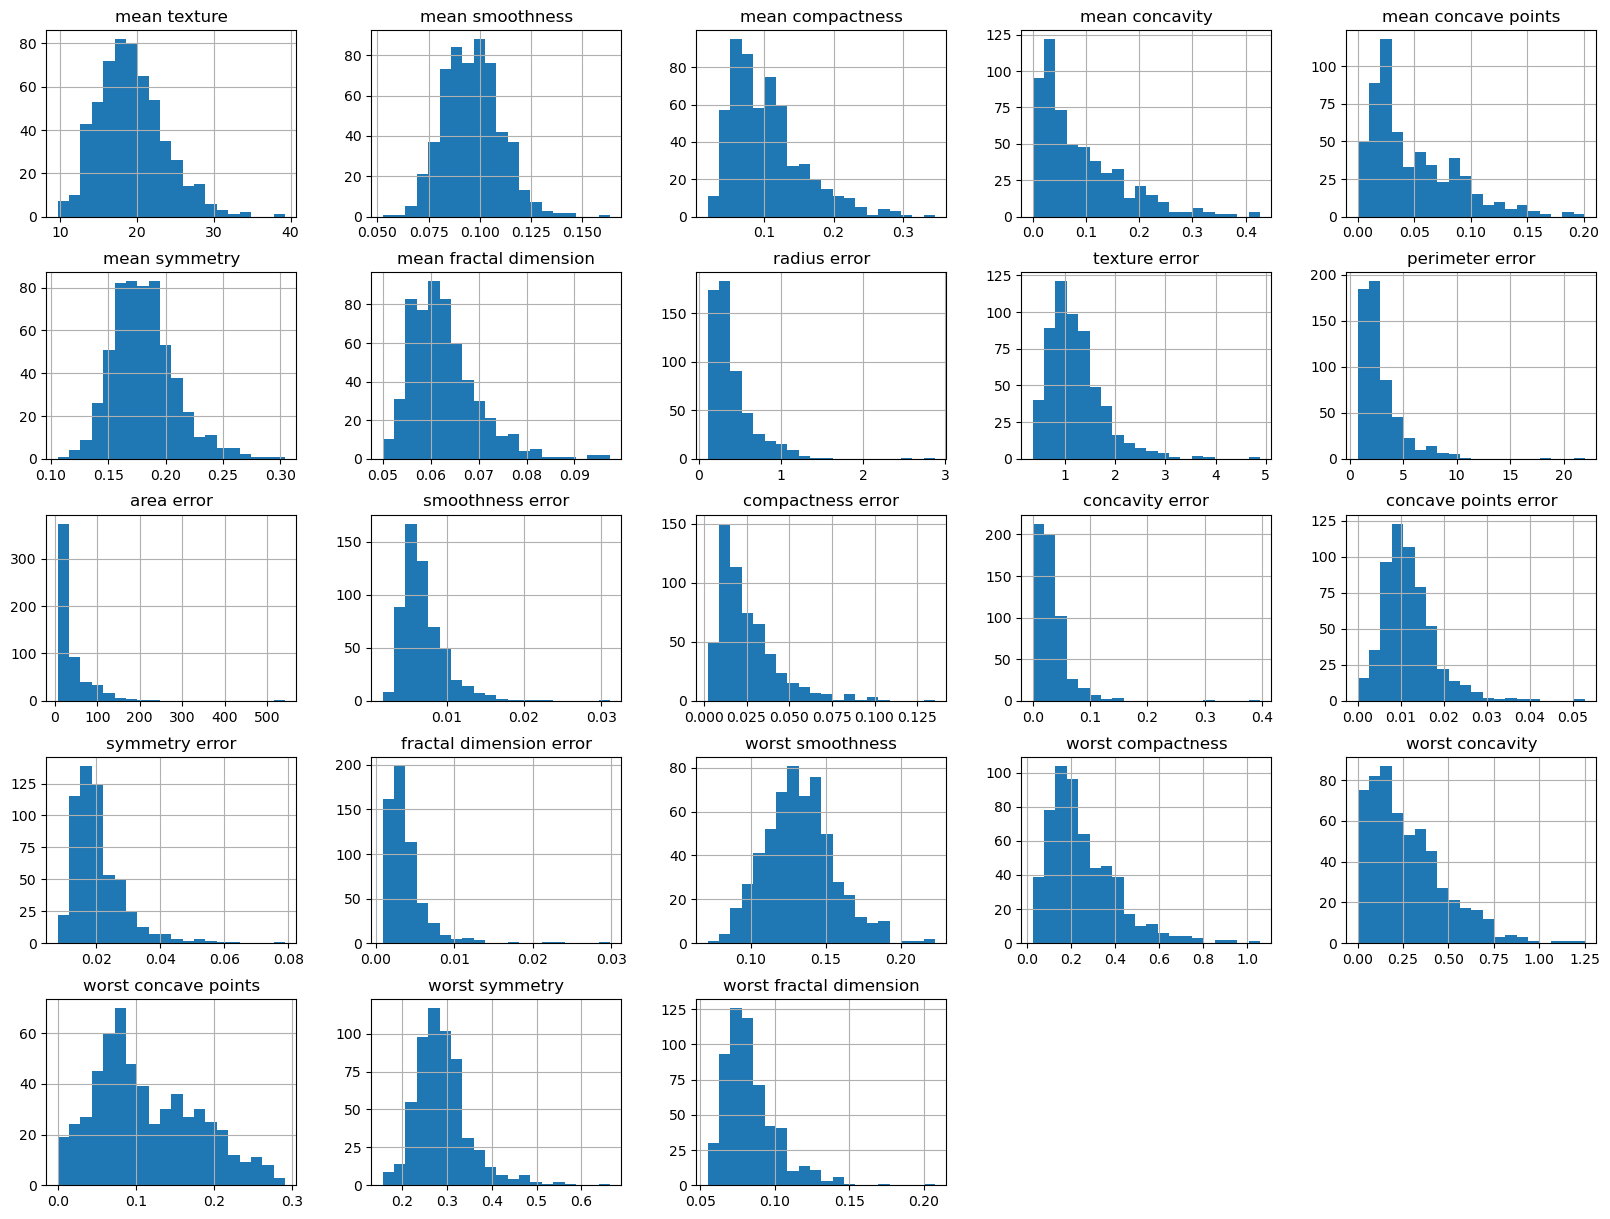

In [50]:
# Basic statistics
print(X.describe())

# Histogram for features visualization
X.hist(bins=20, figsize=(20, 15))
plt.show()



In [51]:
# Initialize the Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=10000)

# K-Fold Cross-Validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=kf)

# Print average CV score
print(f"Cross-validation average accuracy: {np.mean(cv_scores):.3f}")


Cross-validation average accuracy: 0.969


In [52]:
# Define a hyperparameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with l1 penalty
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.971


In [53]:
# Retrieve the best model from grid search
best_logreg = grid_search.best_estimator_

# Train it on the whole training dataset
best_logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = best_logreg.predict(X_test_scaled)

# Final evaluation
print(classification_report(y_test, y_pred))
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.3f}")


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test accuracy: 0.982


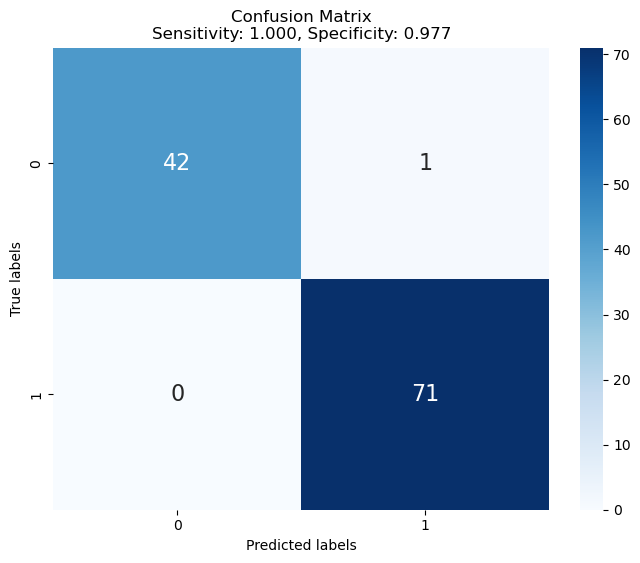

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})

# Add Sensitivity and Specificity to the title
plt.title(f'Confusion Matrix\nSensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}')

# Add labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

